In [1]:
from all_functions import *
from clustering_functions import *

In [2]:
with open("SP100list.txt") as f:
    nodenames = f.read().splitlines()
data = get_quandl_data(nodenames, startdate='2006-06-27', enddate='2017-06-27')
data.to_csv("SP100_20170627.csv")

In [1]:
#nodenames = np.array(importdata("SP100_20170612.csv")[0].columns)

NameError: name 'np' is not defined

In [3]:
trees = construct_trees(filename="SP100_20170627.csv", window=100,
                        enddate='2017-06-26',
                        startdate='2007-06-26',
                        space=10, tree_type='MST')

In [4]:
sorteddates = sorted(trees.keys(), key=lambda d: map(int, d.split('-')))

In [5]:
IGtrees = {}
for key in sorteddates:
    IGtrees[key] = NXtoIG(trees[key])

<p>Newman - community_leading_eigenvector()</p>
<p>Newman Girvan - nx.girvan_newman()</p>
<p>Newman Clauset - community_fastgreedy()</p>

In [7]:
clustersGirvanNewman2 = {}
clustersGirvanNewman4 = {}
clustersGirvanNewman8 = {}
clustersGirvanNewman16 = {}
for key in sorteddates:
    C = tuple(nx.girvan_newman(trees[key]))
    clustersGirvanNewman2[key] = C[0]
    clustersGirvanNewman4[key] = C[2]
    clustersGirvanNewman8[key] = C[6]
    clustersGirvanNewman16[key] = C[14]

In [6]:
clustersNewman, IGclustersNewman = construct_clusters(IGtrees, method='Newman')
clustersClausetNewman, IGclustersClausetNewman = construct_clusters(IGtrees, method="ClausetNewman")

In [9]:
ARI = pd.DataFrame(index=sorteddates[1:])
ARI['GN-2'] = movingARI(clustersGirvanNewman2,nodenames)
ARI['GN-4'] = movingARI(clustersGirvanNewman4,nodenames)
ARI['GN-8'] = movingARI(clustersGirvanNewman8,nodenames)
ARI['GN-16'] = movingARI(clustersGirvanNewman16,nodenames)
ARI['Newman'] = movingARI(clustersNewman,nodenames)
ARI['ClausetNewman'] = movingARI(clustersClausetNewman,nodenames)
%matplotlib inline
ARI.loc[:, ['GN-8',"Newman","ClausetNewman"]].plot(figsize=(20,8))

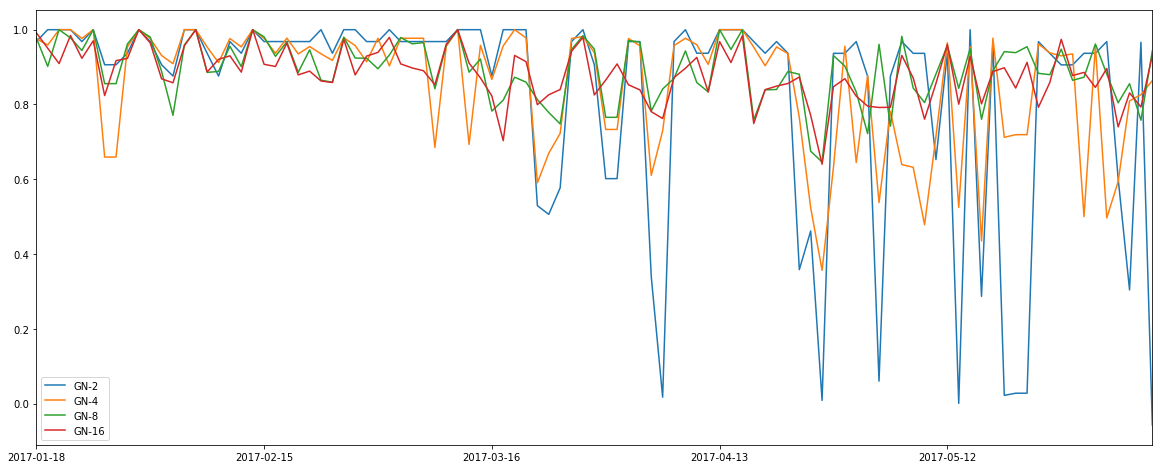

In [25]:
ARI.loc[:, ['GN-2','GN-4','GN-8','GN-16']].plot(figsize=(20,8))

                   mean
GN-2           0.826727
GN-4           0.855733
GN-8           0.893162
GN-16          0.881701
Newman         0.813611
ClausetNewman  0.876155


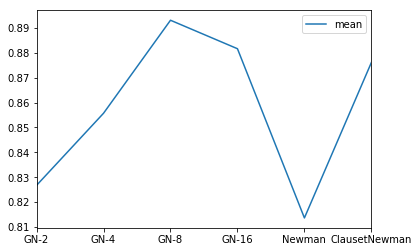

In [10]:
ARImean = pd.DataFrame(index=ARI.columns)
ARImean['mean'] = [np.mean(ARI[i]) for i in ARI.columns]
print(ARImean)
ARImean.plot()

Newman           14.015873
ClausetNewman    11.003968
dtype: float64


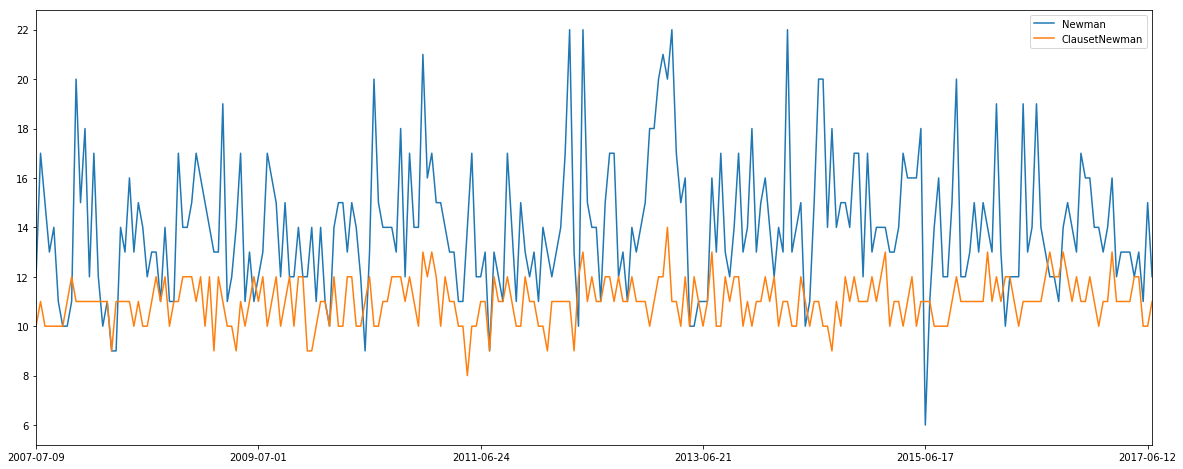

In [7]:
nofclusters = pd.DataFrame(index=sorteddates)
nofclusters['Newman'] = [len(clustersNewman[sorteddates[i]]) for i in range(0,len(sorteddates))]
nofclusters['ClausetNewman']=[len(clustersClausetNewman[sorteddates[i]]) for i in range(0,len(sorteddates))]
print(np.mean(nofclusters))
%matplotlib inline
nofclusters.plot(figsize = (20,8))

In [ ]:
df = importdata("SP100_prices.csv")[1]
enddate = "2017-01-24"
startdate = '2015-12-30'   
end = int(np.where(df.index==enddate)[0])
start = int(np.where(df.index==startdate)[0])
total_trees = MST(filename="SP100_prices.csv", window=end-start+1, enddate="2017-01-24", startdate='2015-12-30'
                  ,space=1)
C = NXtoIG(total_trees[sorteddates[0]]).community_fastgreedy(weights="weight").as_clustering()
total_clusters = list(C)
for i in range(0,len(C)):
    total_clusters[i] = [NXtoIG(total_trees[sorteddates[0]]).vs["name"][j] for j in C[i]]

In [ ]:
HGT = HGT_clustering(total_clusters,clustersClausetNewman,nodenames)
HGT

In [8]:
NewmanUniverse = {}
ClausetNewmanUniverse = {}
for measure in ['degree','closeness','betweenness']:
    NewmanUniverse[measure] = clustering_universe(trees,clustersNewman,measure,quantile=0)
    ClausetNewmanUniverse[measure] = clustering_universe(trees,clustersClausetNewman,measure,quantile=0)
    
universes = {}
universes['Newman'] = NewmanUniverse
universes['ClausetNewman'] = ClausetNewmanUniverse

In [9]:
text_file = open("Central-NewmanBetweenness-20170626.txt", "w")
for t in sorteddates:
    text_file.write('%s: '% t)
    for stock in universes['Newman']['betweenness'][t]['central']:
        text_file.write('%s '% stock)
    text_file.write('\n')
text_file.close()

In [ ]:
download_daily_data(nodenames,'SP10006122017.h5')

{'benchmark':                SP100
 Date                
 2007-07-09  1.000000
 2007-07-10  0.985751
 2007-07-11  1.004853
 2007-07-12  1.018717
 2007-07-13  1.004822
 2007-07-16  0.997705
 2007-07-17  1.000947
 2007-07-18  0.999109
 2007-07-19  1.003953
 2007-07-20  0.989581
 2007-07-23  1.005123
 2007-07-24  0.987665
 2007-07-25  1.012629
 2007-07-26  0.984645
 2007-07-27  0.990151
 2007-07-30  1.015763
 2007-07-31  0.991693
 2007-08-01  1.012328
 2007-08-02  1.011477
 2007-08-03  0.979952
 2007-08-06  1.029941
 2007-08-07  1.036694
 2007-08-08  1.044587
 2007-08-09  1.001381
 2007-08-10  1.029451
 2007-08-13  1.030205
 2007-08-14  1.010947
 2007-08-15  1.016153
 2007-08-16  1.032917
 2007-08-17  1.052199
 ...              ...
 2017-05-15  1.542840
 2017-05-16  1.532340
 2017-05-17  1.510099
 2017-05-18  1.538957
 2017-05-19  1.545691
 2017-05-22  1.540884
 2017-05-23  1.539134
 2017-05-24  1.539031
 2017-05-25  1.540261
 2017-05-26  1.535991
 2017-05-30  1.532979
 2017-05-31  1.5372

In [10]:
price, log_ret = importdata("SP100_20170627.csv")
ret = price/price.shift(1)
ret = ret.iloc[1:]
space = 10
window = 100
univdates = sorted(universes['Newman']['degree'].keys(), key=lambda d: map(int, d.split('-')))
pricedates = sorted(pd.read_csv("SP100_20170627.csv")["Date"], key=lambda d: map(int, d.split('-')))
SP100Performance_weighted = {}
SP100Performance_weighted[univdates[0]]=1
SP100Performance_unweighted = {}
SP100Performance_unweighted[univdates[0]]=1
for t in univdates:
    cov = cov_matrix(ret, price.keys(),window,t)
    weights = np.transpose(min_variance_weights(cov)[0])[0]
    r = ret[pricedates.index(t)-window:pricedates.index(t)+1+space].dropna(axis=1, how='any')
    for tt in pricedates[pricedates.index(t)+1:
                            pricedates.index(t)+1+space]:
        SP100Performance_weighted[tt] = SP100Performance_weighted[t]*np.dot(weights,r[tt:tt].as_matrix()[0])
    weights = np.divide(np.ones(len(cov)),len(cov))
    for tt in pricedates[pricedates.index(t)+1:
                            pricedates.index(t)+1+space]:
        #SP100Performance_unweighted[tt] = SP100Performance_unweighted[t]*np.dot(weights,np.divide(price[tt:tt].as_matrix()[0],
                                                            #price[t:t].as_matrix()[0]))
        SP100Performance_unweighted[tt] = SP100Performance_unweighted[t]*np.dot(weights,r[tt:tt].as_matrix()[0])
df = pd.DataFrame([[key,value] for key,value in SP100Performance_weighted.iteritems()],columns=["Date","SP100"])
df = df.set_index(pd.DatetimeIndex(df['Date']))
df = df.drop(['Date'], axis=1)
df.sort_index(inplace=True)
performance_comparison_weighted = {'benchmark' : df}
df = pd.DataFrame([[key,value] for key,value in SP100Performance_unweighted.iteritems()],columns=["Date","SP100"])
df = df.set_index(pd.DatetimeIndex(df['Date']))
df = df.drop(['Date'], axis=1)
df.sort_index(inplace=True)
performance_comparison_unweighted = {'benchmark' : df}

In [54]:
filename = "SP100_20170627.csv"
window = 100
price, log_ret = importdata(filename)
ret = price / price.shift(1)
ret = ret.iloc[1:]
#universes = universes['Newman']['betweenness']
univdates = sorted(universes.keys(), key=lambda d: map(int, d.split('-')))
pricedates = sorted(pd.read_csv(filename)["Date"], key=lambda d: map(int, d.split('-')))
space = pricedates.index(univdates[1]) - pricedates.index(univdates[0])
weighted = 'TRUE'
result = {'central': {}}
result['central'][univdates[0]] = 1
result['peripheral'] = {}
result['peripheral'][univdates[0]] = 1
for t in univdates:
    for j in ['central', 'peripheral']:
        cov = cov_matrix(ret, universes[t][j], window, t)
        r = ret[pricedates.index(t) - window:pricedates.index(t) + 1 + space].dropna(axis=1, how='any')[universes[t][j]]
        if len(np.atleast_1d(cov)) == 1:
            weights = [1]
        elif weighted == 'TRUE':
            weights = np.transpose(min_variance_weights(cov)[0])[0]
        else:
            weights = np.divide(np.ones(len(cov)), len(cov))
        for tt in pricedates[pricedates.index(t) + 1:
                        pricedates.index(t) + 1 + space]:
            result[j][tt] = result[j][t] * np.dot(weights, r[tt:tt].as_matrix()[0])

In [11]:
for method in ['Newman', 'ClausetNewman']:
    performance_comparison_unweighted[method] = {}
    for measure in ['degree', 'closeness', 'betweenness']:
        temp = clustering_performance(filename="SP100_20170627.csv", universes=universes[method][measure],
                                      weighted='FALSE', window=100)
        temp['SP100'] = SP100Performance_unweighted
        performance_comparison_unweighted[method][measure] = pd.DataFrame.from_dict(temp)
for method in ['Newman', 'ClausetNewman']:
    performance_comparison_weighted[method] = {}
    for measure in ['degree', 'closeness', 'betweenness']:
        temp = clustering_performance(filename="SP100_20170627.csv", universes=universes[method][measure],
                                      weighted='TRUE', window=100)
        temp['SP100'] = SP100Performance_weighted
        performance_comparison_weighted[method][measure] = pd.DataFrame.from_dict(temp)

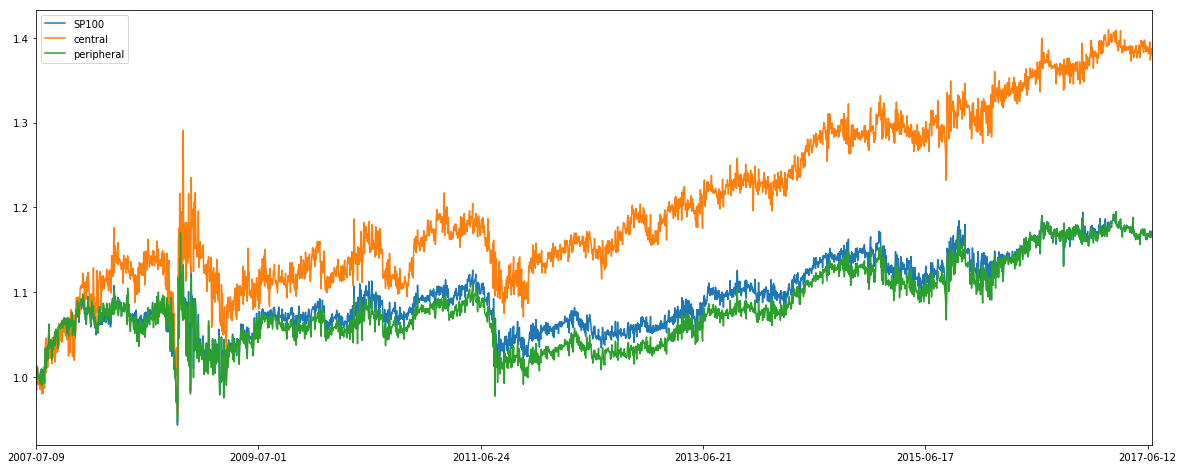

In [14]:
performance_comparison_weighted['ClausetNewman']['betweenness'].plot(figsize=(20,8))

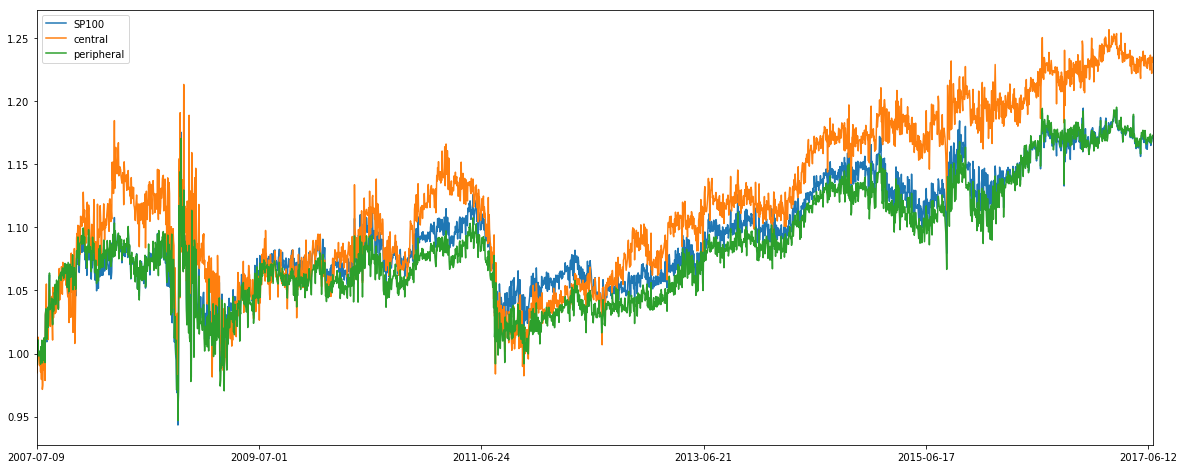

In [20]:
performance_comparison_weighted['Newman']['betweenness'].plot(figsize=(20, 8))

plt.savefig('Newman_betweenness_performance.pdf')

In [ ]:
performance_comparison_weighted['ClausetNewman']['closeness'].plot(figsize=(20,8))

In [ ]:
performance_comparison_weighted['Newman']['closeness'].plot(figsize=(20,8))

In [ ]:
performance_comparison_weighted['Newman']['degree'].plot(figsize=(20,8))

In [ ]:
performance_comparison_weighted['ClausetNewman']['degree'].plot(figsize=(20,8))

In [ ]:
performance_comparison_unweighted['ClausetNewman']['betweenness'].plot(figsize=(20,8))

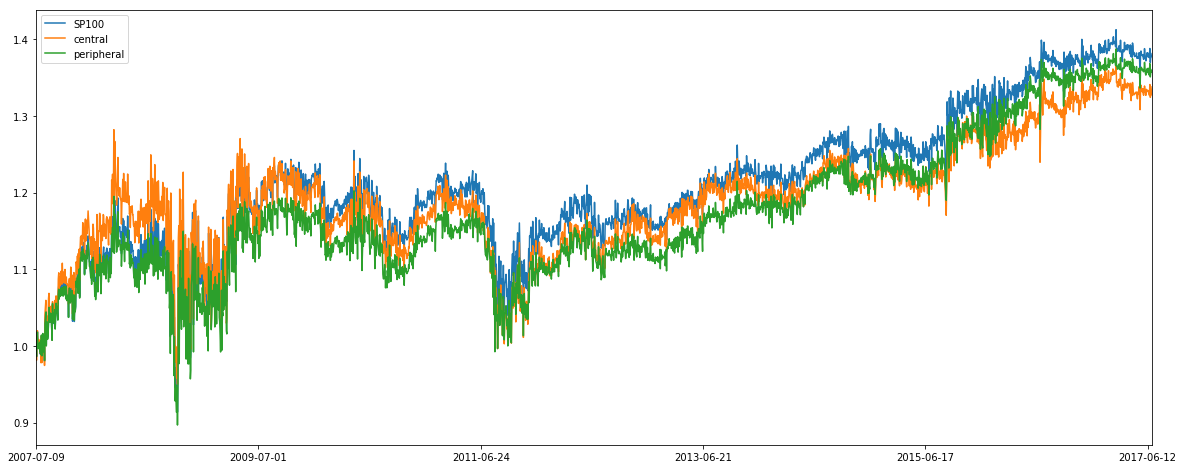

In [15]:
performance_comparison_unweighted['Newman']['betweenness'].plot(figsize=(20,8))

In [ ]:
performance_comparison_unweighted['ClausetNewman']['degree'].plot(figsize=(20,8))

In [ ]:
performance_comparison_unweighted['Newman']['degree'].plot(figsize=(20,8))

In [ ]:
performance_comparison_unweighted['ClausetNewman']['closeness'].plot(figsize=(20,8))

In [ ]:
performance_comparison_unweighted['Newman']['closeness'].plot(figsize=(20,8))

In [ ]:
for method in ['Newman','ClausetNewman']:
    for measure in ['degree','closeness','betweenness']:
        print(method)
        print(measure)
        print(np.sqrt(np.var(performance_comparison_weighted[method][measure]/
                     performance_comparison_weighted[method][measure].shift(1))))

In [17]:
x = [[1],[1,2,3],[1,2,3,4],[1,2]]
x = {i+1:x[i] for i in range(len(x))}

In [19]:
max(keys)

4

In [18]:
keys = sorted(x, key=lambda k: len(x[k]), reverse=True)

In [11]:
ordered_keys = sorted(results[sorteddates[0]], key=lambda k: len(results[sorteddates[0]][k]), reverse=True)

In [12]:
clustersClausetNewman[sorteddates[0]]

[['AXP', 'BK', 'USB', 'WBA', 'CVS', 'TWX'],
 ['NSC',
  'GE',
  'GM',
  'XLI',
  'EMR',
  'UPS',
  'UNP',
  'F',
  'WMT',
  'EBAY',
  'MMM',
  'XHB',
  'CAT',
  'FDX',
  'HON',
  'UTX'],
 ['BA', 'XAR', 'GD', 'RTN', 'LMT'],
 ['AAPL',
  'AMZN',
  'ACN',
  'T',
  'XLK',
  'INTC',
  'VZ',
  'MA',
  'FB',
  'MSFT',
  'IBM',
  'V',
  'GOOG'],
 ['XBI',
  'XPH',
  'MRK',
  'XLV',
  'LLY',
  'BMY',
  'JNJ',
  'ABBV',
  'AMGN',
  'GILD',
  'BIIB',
  'PFE'],
 ['EXC',
  'SPG',
  'XLU',
  'XLP',
  'PG',
  'PM',
  'MO',
  'MDLZ',
  'PEP',
  'COST',
  'SO',
  'CL',
  'KO',
  'MCD'],
 ['XLY', 'FOXA', 'HD', 'SBUX', 'XRT', 'CMCSA', 'LOW', 'DIS', 'TGT', 'NKE'],
 ['HAL', 'APC', 'NOV', 'COP', 'DVN', 'XES', 'XOP'],
 ['APA',
  'XLE',
  'XLB',
  'OXY',
  'MON',
  'DOW',
  'FCX',
  'XME',
  'CVX',
  'DD',
  'XOM',
  'SLB'],
 ['KIE',
  'WFC',
  'JPM',
  'KBE',
  'C',
  'KCE',
  'MS',
  'COF',
  'XLF',
  'XTN',
  'KRE',
  'ALL',
  'MET',
  'BAC',
  'GS',
  'AIG'],
 ['XSW', 'XHE', 'MDT', 'UNH', 'XTL', 'BAX', 'XHS'

In [13]:
label_clusters(results[sorteddates[0]], clustersClausetNewman[sorteddates[1]])

{1: ['AXP', 'BK', 'USB', 'WBA', 'CVS', 'TWX'],
 2: ['NSC',
  'GE',
  'GM',
  'XLI',
  'EMR',
  'UPS',
  'UNP',
  'F',
  'WMT',
  'EBAY',
  'MMM',
  'XHB',
  'CAT',
  'FDX',
  'HON',
  'HPQ',
  'UTX'],
 3: ['BA', 'XAR', 'GD', 'RTN', 'LMT'],
 4: ['AAPL',
  'AMZN',
  'ACN',
  'T',
  'XLK',
  'INTC',
  'VZ',
  'MA',
  'FB',
  'MSFT',
  'IBM',
  'V',
  'GOOG'],
 5: ['XBI',
  'XPH',
  'MRK',
  'XLV',
  'LLY',
  'BMY',
  'JNJ',
  'ABBV',
  'AMGN',
  'GILD',
  'BIIB',
  'PFE'],
 6: ['EXC',
  'SPG',
  'XLU',
  'XLP',
  'PG',
  'PM',
  'MO',
  'MDLZ',
  'PEP',
  'COST',
  'SO',
  'CL',
  'KO',
  'MCD'],
 7: ['XLY', 'FOXA', 'HD', 'SBUX', 'XRT', 'CMCSA', 'LOW', 'DIS', 'TGT', 'NKE'],
 8: ['HAL', 'APC', 'NOV', 'COP', 'DVN', 'XES', 'XOP'],
 9: ['APA',
  'XLE',
  'XLB',
  'OXY',
  'MON',
  'DOW',
  'FCX',
  'XME',
  'CVX',
  'DD',
  'XOM',
  'SLB'],
 10: ['KIE',
  'WFC',
  'JPM',
  'KBE',
  'C',
  'KCE',
  'MS',
  'COF',
  'XLF',
  'XTN',
  'KRE',
  'ALL',
  'MET',
  'BAC',
  'GS',
  'AIG'],
 11: ['XS

In [31]:
temp = label_clustering_series(clustersClausetNewman, p_value=0.01)

In [34]:
sorteddates[1]

'2017-01-18'

ValueError: max() arg is an empty sequence

In [10]:
sorteddates = sorted(clustersClausetNewman.keys(), key=lambda d: map(int, d.split('-')))
results = {}
results[sorteddates[0]] = {i + 1: clustersClausetNewman[sorteddates[0]][i]
                           for i in range(len(clustersClausetNewman[sorteddates[0]]))}

In [37]:
df

,AAPL,ABBV,ABT,ACN,AIG,ALL,AMGN,AMZN,APA,APC,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,110.38,65.44,45.02,89.31,56.01,70.25,159.29,310.350,62.67,82.50,...,119.13,111.17,44.95,115.00,262.20,46.78,76.20,54.82,85.88,92.45
2015-01-02,109.33,65.89,44.90,88.84,56.11,70.12,159.89,308.520,63.83,82.29,...,118.61,110.38,44.83,115.04,265.02,46.96,76.00,54.70,85.90,92.83
2015-01-05,106.25,64.65,44.91,87.34,55.00,68.73,157.99,302.190,59.91,75.80,...,114.60,108.17,43.75,113.12,259.17,46.57,74.50,53.20,85.65,90.29
2015-01-06,106.26,64.33,44.40,86.71,54.22,68.68,152.90,295.290,59.26,75.24,...,112.23,107.46,43.17,111.52,257.50,47.04,74.69,52.09,86.31,89.81
2015-01-07,107.75,66.93,44.76,88.53,54.48,69.81,158.24,298.420,58.60,76.44,...,112.85,108.46,43.55,112.73,260.95,46.19,76.60,52.40,88.60,90.72
2015-01-08,111.89,67.63,45.68,89.88,54.24,71.15,157.67,300.460,60.87,78.91,...,117.08,110.41,43.87,114.65,264.45,47.18,77.55,53.56,90.47,92.23
2015-01-09,112.01,65.78,45.20,89.78,53.32,70.42,155.73,296.930,60.69,79.14,...,114.98,109.60,42.96,114.02,260.53,46.76,75.67,52.68,89.35,92.10
2015-01-12,109.25,65.76,45.58,89.51,52.36,69.70,156.22,291.410,58.46,75.05,...,113.97,109.64,42.56,114.45,260.02,47.08,75.70,52.05,90.02,90.33
2015-01-13,110.22,63.39,44.61,89.83,51.87,70.12,155.14,294.740,58.46,75.80,...,111.83,110.11,42.10,114.34,260.78,47.18,75.26,51.85,89.31,90.00


In [46]:
quandl.get("WIKI/BRK_B.11",start_date="2014-12-31", end_date="2016-12-31")

,Adj. Close
Date,
2014-12-31,150.15
2015-01-02,149.17
2015-01-05,147.00
2015-01-06,146.84
2015-01-07,148.88
2015-01-08,151.37
2015-01-09,149.47
2015-01-12,148.28
2015-01-13,148.63


In [13]:
df = quandl.get("WIKI/"+nodenames[0]+".4",start_date="2014-12-31", end_date="2016-12-31")
df.columns = [nodenames[0]]
for stock in nodenames[1:]:
    print stock
    df[stock] = quandl.get("WIKI/"+stock+".4",start_date="2014-12-31", end_date="2016-12-31")

MSFT


AMZN


JNJ


FB


XOM


BRK_B


JPM


GOOGL


GOOG


GE


WFC


T


PG


BAC


PFE


CVX


CMCSA


VZ


PM


HD


MRK


UNH


V


C


KO


PEP


CSCO


INTC


DIS


ORCL


MO


IBM


AMGN


MMM


MCD


MDT


MA


ABBV


BA


WMT


CELG


HON


BMY


GILD


PCLN


SLB


UTX


UNP


SBUX


ABT


AGN


QCOM


LLY


CVS


USB


GS


TXN


TWX


UPS


ACN


DOW


NKE


DD


COST


LMT


MDLZ


NEE


CL


WBA


LOW


MS


AXP


CAT


DUK


PYPL


BIIB


MET


GD


AIG


COP


KHC


FDX


DHR


MON


BK


BLK


SPG


SO


GM


RTN


OXY


F


COF


EMR


KMI


HAL


EXC


ALL


FOXA


TGT


BLKFDS


NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.

In [ ]:
for method in ['Newman','ClausetNewman']:
    for measure in ['degree','closeness','betweenness']:
        print(method)
        print(measure)
        print(np.sqrt(np.var(performance_comparison_unweighted[method][measure]/
                     performance_comparison_unweighted[method][measure].shift(1))))